In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('admission_data.csv')

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape

(500, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [8]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [9]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [10]:
y=y.astype('int')

In [11]:
y

0      1
1      1
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Chance of Admit , Length: 500, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

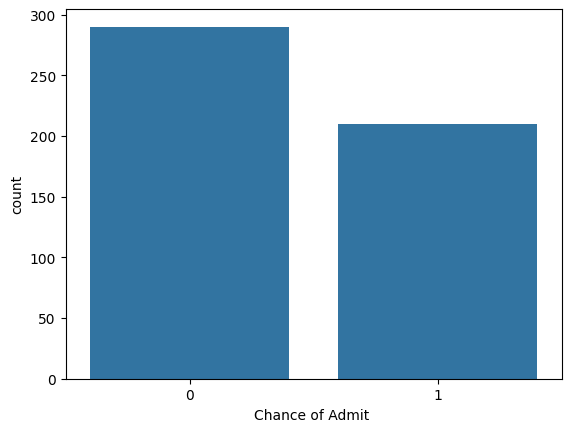

In [12]:
sns.countplot(x=y)

In [13]:
y.value_counts()

Chance of Admit 
0    290
1    210
Name: count, dtype: int64

In [14]:
#cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [15]:
x_train.shape

(375, 8)

In [16]:
y_test.shape

(125,)

In [17]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
90,91,318,106,2,4.0,4.0,7.92,1
254,255,321,114,4,4.0,5.0,9.12,0
283,284,321,111,3,2.5,3.0,8.90,1
445,446,328,116,5,4.5,5.0,9.08,1
461,462,301,102,3,2.5,2.0,8.13,1
...,...,...,...,...,...,...,...,...
430,431,311,104,3,4.0,3.5,8.13,1
49,50,327,111,4,3.0,4.0,8.40,1
134,135,333,113,5,4.0,4.0,9.28,1
365,366,330,114,4,4.5,3.0,9.17,1


In [18]:
#import thr class 
from sklearn.tree import DecisionTreeClassifier

In [19]:
classifier=DecisionTreeClassifier(random_state=0)

In [20]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
y_pred=classifier.predict(x_test)

In [22]:
result=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred
})

In [23]:
result

,actual,predicted
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0
...,...,...
430,0,0
49,1,0
134,1,1
365,1,1


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

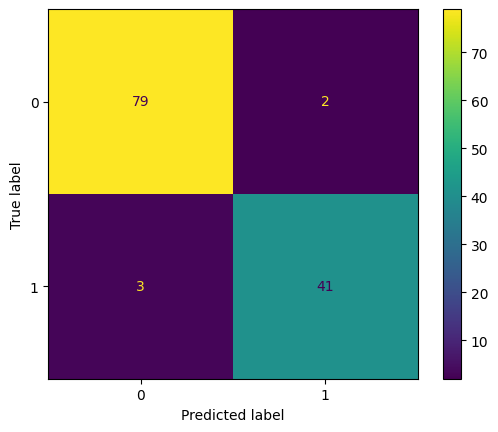

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [26]:
accuracy_score(y_test,y_pred)

0.96

In [27]:
from sklearn.tree import plot_tree

[Text(0.5288461538461539, 0.9583333333333334, 'x[6] <= 8.735\ngini = 0.493\nsamples = 375\nvalue = [209, 166]'),
 Text(0.2564102564102564, 0.875, 'x[1] <= 318.5\ngini = 0.211\nsamples = 217\nvalue = [191, 26]'),
 Text(0.14102564102564102, 0.7916666666666666, 'x[6] <= 8.25\ngini = 0.103\nsamples = 183\nvalue = [173, 10]'),
 Text(0.11538461538461539, 0.7083333333333334, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.16666666666666666, 0.7083333333333334, 'x[4] <= 4.75\ngini = 0.224\nsamples = 78\nvalue = [68, 10]'),
 Text(0.10256410256410256, 0.625, 'x[2] <= 99.5\ngini = 0.191\nsamples = 75\nvalue = [67, 8]'),
 Text(0.05128205128205128, 0.5416666666666666, 'x[0] <= 361.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.02564102564102564, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07692307692307693, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.15384615384615385, 0.5416666666666666, 'x[2] <= 105.5\ngini = 0.157\nsamples =

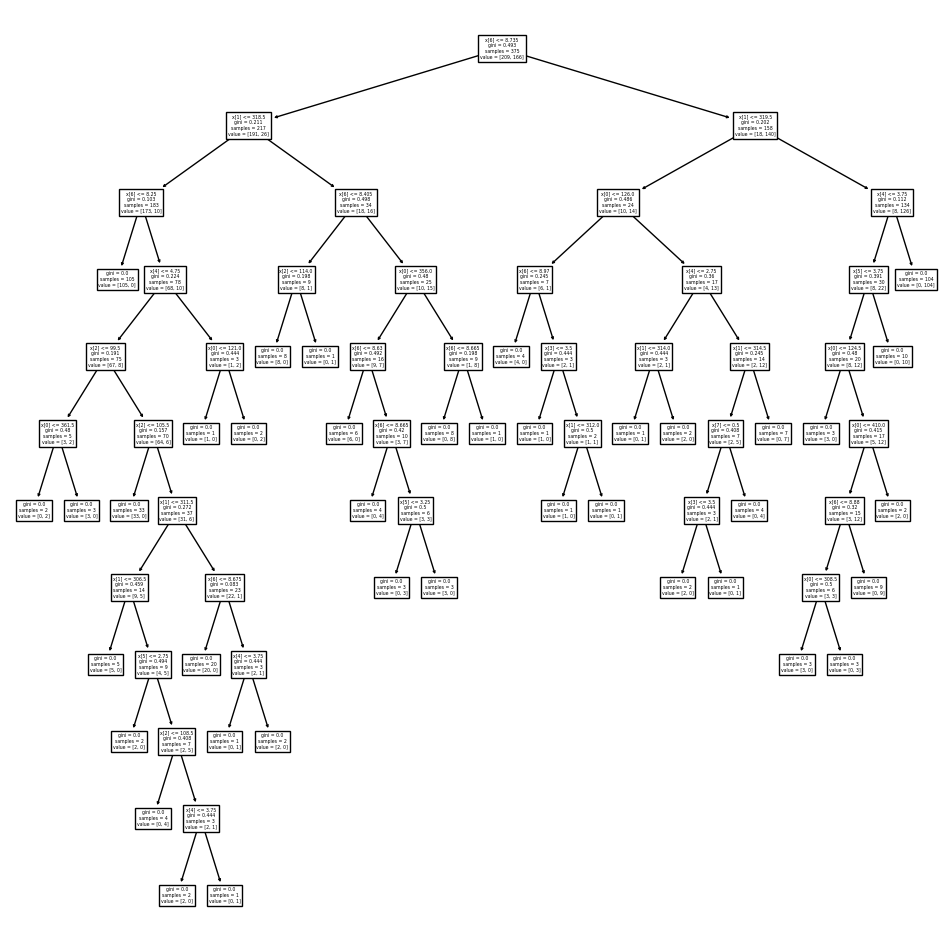

In [28]:
plt.figure(figsize=(12,12))
plot_tree(classifier)

In [29]:
from sklearn.tree import plot_tree

[Text(0.5288461538461539, 0.9583333333333334, 'x[6] <= 8.735\ngini = 0.493\nsamples = 375\nvalue = [209, 166]'),
 Text(0.2564102564102564, 0.875, 'x[1] <= 318.5\ngini = 0.211\nsamples = 217\nvalue = [191, 26]'),
 Text(0.14102564102564102, 0.7916666666666666, 'x[6] <= 8.25\ngini = 0.103\nsamples = 183\nvalue = [173, 10]'),
 Text(0.11538461538461539, 0.7083333333333334, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.16666666666666666, 0.7083333333333334, 'x[4] <= 4.75\ngini = 0.224\nsamples = 78\nvalue = [68, 10]'),
 Text(0.10256410256410256, 0.625, 'x[2] <= 99.5\ngini = 0.191\nsamples = 75\nvalue = [67, 8]'),
 Text(0.05128205128205128, 0.5416666666666666, 'x[0] <= 361.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.02564102564102564, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07692307692307693, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.15384615384615385, 0.5416666666666666, 'x[2] <= 105.5\ngini = 0.157\nsamples =

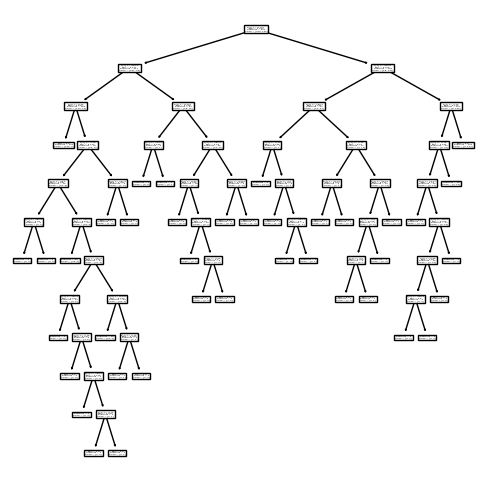

In [30]:
plt.figure(figsize=(6,6))
plot_tree(classifier)